In [1]:
# import os
# import re
# import seaborn as sns
# import h5py

# from PIL import Image
from scipy.io import loadmat
import cv2
from cv2 import VideoWriter,VideoWriter_fourcc,imread,resize
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/anaconda3/envs/py36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/envs/py36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/envs/py36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_

In [2]:
np.arange(7,192,8)

array([  7,  15,  23,  31,  39,  47,  55,  63,  71,  79,  87,  95, 103,
       111, 119, 127, 135, 143, 151, 159, 167, 175, 183, 191])

dict_keys(['__header__', '__version__', '__globals__', 'trial', 'data', 'gesture', 'subject'])


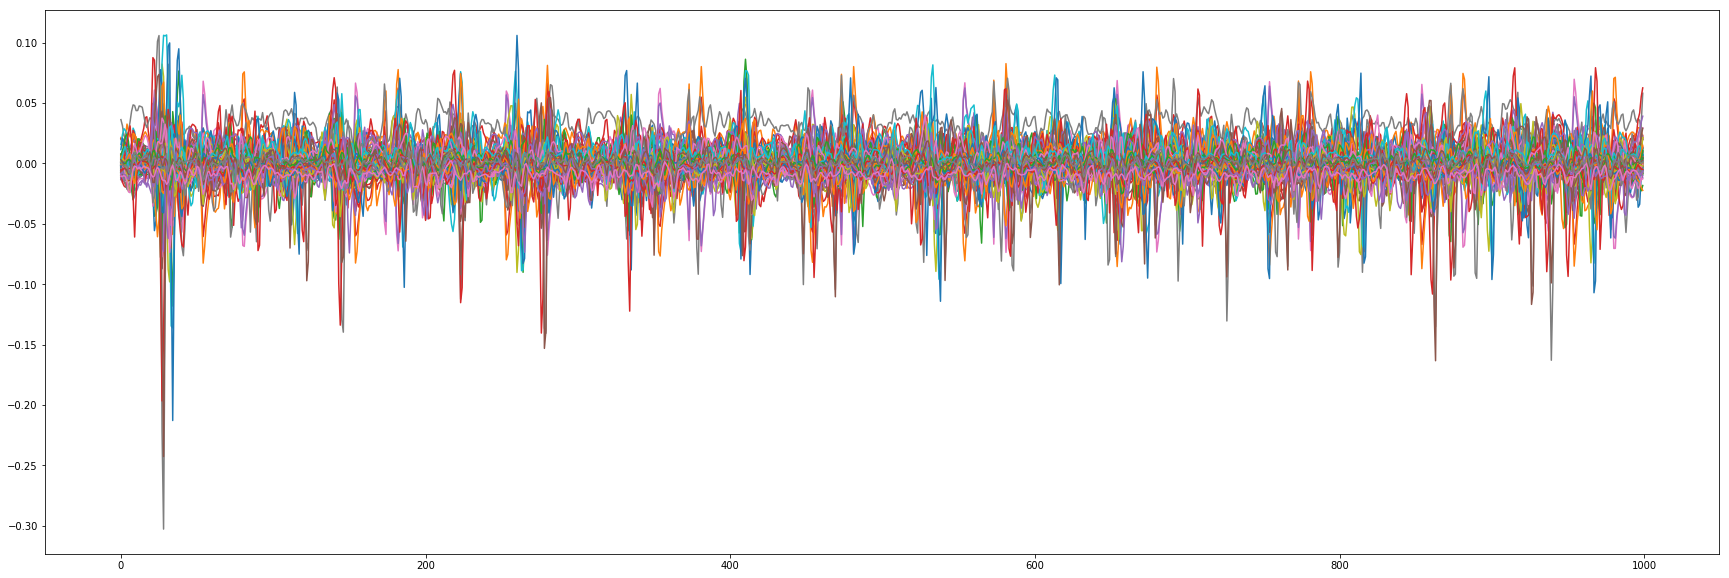

In [24]:
# visualize data using the method in Gesture recognition
# TODO: 把图片整成视频
FILE_NAME = 'capg/dba/003-001-010.mat'
OUT_NAME = 'capg-003-001-010.mp4'
mat = loadmat('../data/' + FILE_NAME)
print(mat.keys())
emg_array = np.array(mat['data'])
# trial0 = emg_array[0, 0]
# trial0 = np.delete(trial0, np.s_[7:192:8], 0)
# print(trial0.shape)

# plt.figure(figsize=(30,10))
# for i in range(0,168):
#     plt.plot(trial0[i,:])
    
# plt.figure(figsize=(30,10))
# for i in range(0,192):
#     plt.plot(emg_array[0, 0][i,:])
    
plt.figure(figsize=(30,10))
for i in range(0, 128):
    plt.plot(emg_array[:,i])

In [25]:
# convert data from [-2.5, 2.5]  to [0, 1]
scale = 10000
emg_array = np.absolute(emg_array * scale) / (2.5*scale)

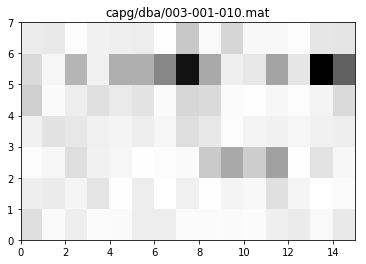

In [26]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure()
plt.title(FILE_NAME)
frames = []
x = np.arange(0, 16)
y = np.arange(0, 8).reshape(-1, 1)
for row in emg_array:
    frame = np.reshape(row, (8, 16))
    frames.append((plt.pcolor(x, y, frame, cmap=plt.cm.gray_r),))

emg_ani = animation.ArtistAnimation(fig, frames, blit=True)
emg_ani.save(OUT_NAME, writer=writer)

In [3]:
# opencv代码,跑不通
# fps = 60
# fourcc=VideoWriter_fourcc(*'mp4v')
# videoWriter = VideoWriter('./test.mp4', fourcc, fps, (541, 618))
# for row in emg_array:
# #     frame = cmap(np.reshape(row, (8, 16))) * 255
# #     frame = frame[:, :, 0:3].astype(int)
# #     plt.imshow(frame)
# #     break
# #     print(frame.shape)
# #     break
#     frame = imread('../data/sample/test.jpg')
# #     print(frame.shape)
# #     cv2.waitKey(int(1000/fps))
#     videoWriter.write(frame)
# videoWriter.release()

In [ ]:
# # store all db-a data in a h5 file
# if not os.path.isfile('../data/capg_myo_a.h5'):
#     print('the data file not exist, create from raw data')
#     # read all capg data files and store the data in a numpy array
#     capg_data = np.zeros((18, 8, 10, 1000, 128))
#                         # [subject, gesture, trial, sensor, time]
#     DATA_DIR = '../data/CapgMyo/dba/'
#     for root, _, files in os.walk(DATA_DIR):
#         for file in files:
#             # filte data files
#             if re.match('[0-9\-.]+mat$', file):
#                 file_path = os.path.join(root, file)
#                 mat = loadmat(file_path)
#                 subject, gesture, trial = mat['subject'][0][0], mat['gesture'][0][0], mat['trial'][0][0]
#                 if gesture > 9:
#                     # ignore the gesture 100 and 101
#                     continue
#                 capg_data[subject-1, gesture-1, trial-1] = np.array(mat['data'])
#     h5f = h5py.File('../data/capg_myo_a.h5', 'w')
#     h5f.create_dataset('capg', data=capg_data)
#     h5f.close()
#     print('the data file created')
# else:
#     print('the data file exist')
#     h5f = h5py.File('../data/capg_myo_a.h5', 'r')
#     capg_data = h5f['capg'][:]
#     h5f.close()
# print(capg_data.shape)

In [ ]:
# print(capg_data.max())
# print(capg_data.min())

In [ ]:
# # the min and max values distribution of sensor0 data
# max_values = []
# min_values = []

# for s in range(18):
#     for g in range(8):
#         for t in range(10):
#             max_values.append(capg_data[s, g, t, :, 0].max())
#             min_values.append(capg_data[s, g, t, :, 0].min())
            
# sns.distplot(max_values)
# sns.distplot(min_values)

In [ ]:
# # plot the signal data of the same sensor data on the same subject
# # subject 0, gesture 0, all trails, sensors 0
# sensor0_data = capg_data[0, 0, :, :, 0]
# print(sensor0_data.shape)

# plt.figure(figsize=(30,10))
# for i in range(4, 6):
#     plt.plot(sensor0_data[i,0:1000])

In [ ]:
# plt.figure(figsize=(30,10))
# for i in range(0, 4):
#     plt.plot(sensor0_data[i,0:100])

In [ ]:
# plt.figure(figsize=(30,10))
# plt.plot(sensor0_data[0, 100:200])

In [ ]:
# # TODO: low pass filter
# # TODO: high pass filter
# # how to do fft with python?

# time = np.linspace(0,10,2000) 
# signal = np.cos(5*np.pi*time) + np.cos(7*np.pi*time) 

# W = fftfreq(signal.size, d=time[1]-time[0]) 
# f_signal = rfft(signal) 

# # If our original signal time was in seconds, this is now in Hz  
# cut_f_signal = f_signal.copy() 
# cut_f_signal[(W<6)] = 0 

# cut_signal = irfft(cut_f_signal)

# plt.subplot(221) 
# plt.plot(time,signal) 
# plt.subplot(222) 
# plt.plot(W,f_signal) 
# plt.xlim(0,10) 
# plt.subplot(223) 
# plt.plot(W,cut_f_signal) 
# plt.xlim(0,10) 
# plt.subplot(224) 
# plt.plot(time,cut_signal) 
# plt.show() 